In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2022-04-29 18:06:50.640468: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-29 18:06:50.640495: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
tf.__version__

'2.8.0'

## Creating tensor

In [3]:
scalar = tf.constant(10, dtype=float)
scalar

2022-04-29 18:06:54.458276: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-29 18:06:54.458319: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-29 18:06:54.458344: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (batman): /proc/driver/nvidia/version does not exist
2022-04-29 18:06:54.460149: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [4]:
vector = tf.constant([1, 2, 3])
vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [5]:
tensor = tf.constant([[[1, 2, 3],
                      [4, 5, 6]],
                     
                     [[10, 20, 30],
                     [40, 50, 60]],
                     
                     [[100, 200, 300],
                     [400, 500, 600]]])
tensor, tensor.ndim

(<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
 array([[[  1,   2,   3],
         [  4,   5,   6]],
 
        [[ 10,  20,  30],
         [ 40,  50,  60]],
 
        [[100, 200, 300],
         [400, 500, 600]]], dtype=int32)>,
 3)

In [6]:
varScalar = tf.Variable(10)
varScalar

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=10>

In [7]:
varTensor = tf.Variable([[[1, 2], [2, 4]],
                        [[4, 5], [8, 10]]])
varTensor

<tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=int32, numpy=
array([[[ 1,  2],
        [ 2,  4]],

       [[ 4,  5],
        [ 8, 10]]], dtype=int32)>

## Shuffling tensor + Random Initialization

In [8]:
tf.random.set_seed(42)
shuffledTensor = tf.random.shuffle(varTensor)
shuffledTensor

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[ 4,  5],
        [ 8, 10]],

       [[ 1,  2],
        [ 2,  4]]], dtype=int32)>

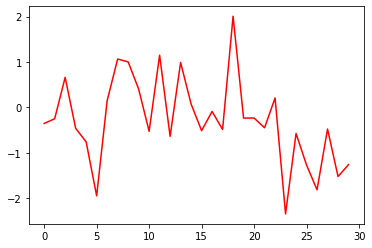

In [9]:
randomVarScalar = tf.random.Generator.from_seed(42)
randomVarScalar = randomVarScalar.normal(shape=(50, ))
randomVarScalar = tf.random.shuffle(randomVarScalar)

plt.plot(randomVarScalar[20:], color='r')

In [10]:
tempVar = tf.Variable([[[1,2,3], [4,5,6], [7,8,9]]])
tempVar

<tf.Variable 'Variable:0' shape=(1, 3, 3) dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]], dtype=int32)>

## Assigning new values to tensor

In [11]:
tempSc = tf.Variable(5)
tempSc
x = tempSc.assign(9)
x

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=9>

In [12]:
A_zeros = tf.zeros(shape=(3,2,5))
A_zeros

<tf.Tensor: shape=(3, 2, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [13]:
A_ones = tf.ones([3, 2, 3])
A_ones

<tf.Tensor: shape=(3, 2, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [14]:
numpy_X = np.array(np.arange(1, 25))
tf_const_X = tf.constant(numpy_X, shape=(3, 4, 2))
tf_const_X.ndim, tf_const_X

(3,
 <tf.Tensor: shape=(3, 4, 2), dtype=int64, numpy=
 array([[[ 1,  2],
         [ 3,  4],
         [ 5,  6],
         [ 7,  8]],
 
        [[ 9, 10],
         [11, 12],
         [13, 14],
         [15, 16]],
 
        [[17, 18],
         [19, 20],
         [21, 22],
         [23, 24]]])>)

In [15]:
numpy_X = numpy_X.reshape(2, 2, 6)
tf_Var_X = tf.Variable(numpy_X)
print(type(tf_Var_X))

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


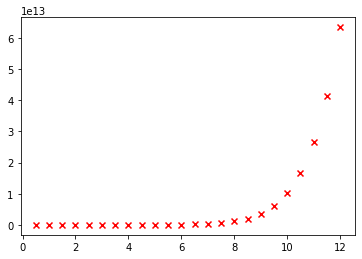

In [16]:
plt.scatter(tf_Var_X/2, tf_const_X**10, color='r', marker='x')

## Attributes of tensor

In [17]:
tensor_A = tf.random.Generator.from_seed(42)
tensor_A = tf.floor(tensor_A.normal(shape=(2,2,2)))
tensor_A

<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
array([[[-1., -1.],
        [ 0., -2.]],

       [[-1., -2.],
        [ 0., -1.]]], dtype=float32)>

In [18]:
print("Datatype of every element: ", tensor_A.dtype)
print("Number of dimensions(Rank)", tensor_A.ndim)
print("Shape of tensor: ", tensor_A.shape)
print("Elements along the 0 axis: ", tensor_A.shape[0])
print("Elements along the last axis: ", tensor_A.shape[-1])
print("Total # of elements in tensor: ", tf.size(tensor_A))
print("Total # of elements in tensor (Numpy): ", tf.size(tensor_A).numpy())

Datatype of every element:  <dtype: 'float32'>
Number of dimensions(Rank) 3
Shape of tensor:  (2, 2, 2)
Elements along the 0 axis:  2
Elements along the last axis:  2
Total # of elements in tensor:  tf.Tensor(8, shape=(), dtype=int32)
Total # of elements in tensor (Numpy):  8


## Practice

In [19]:
# A = tf.random.Generator.from_seed(10)
tf.random.set_seed(1)
A = tf.floor((tf.random.uniform(shape=(10,), minval=0, maxval=10)))
B = tf.floor(tf.random.normal(shape=(10,)))
A = tf.random.shuffle(A)
B = tf.random.shuffle(B)

In [20]:
A, B

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([6., 1., 6., 2., 9., 6., 6., 4., 9., 4.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([-2.,  0., -2., -1.,  0., -1.,  1.,  0., -2., -1.], dtype=float32)>)

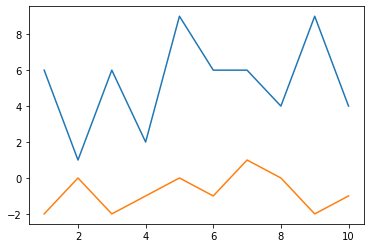

In [21]:
plt.plot([1,2,3,4,5,6,7,8,9,10], A)
plt.plot([1,2,3,4,5,6,7,8,9,10], B)

<BarContainer object of 10 artists>

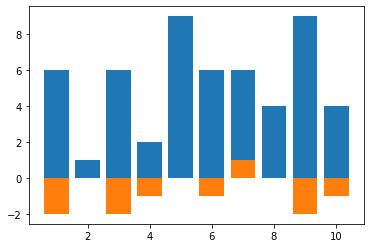

In [22]:
plt.bar([1,2,3,4,5,6,7,8,9, 10], A)
plt.bar([1,2,3,4,5,6,7,8,9, 10], B)

## Indexing Tensors

In [23]:
I_tensor = tf.Variable([[1, 2], 
                        [3, 4]])
I_tensor

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [24]:
I_tensor[1][1]

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [25]:
I_tensor[1, :]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4], dtype=int32)>

In [26]:
I_tensor[1, 0]

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [27]:
tf.expand_dims(I_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]]], dtype=int32)>

In [28]:
I_tensor = I_tensor[..., tf.newaxis]

In [29]:
I_tensor = I_tensor[tf.newaxis, ...]
I_tensor = I_tensor[tf.newaxis, ...]

In [30]:
I_tensor

<tf.Tensor: shape=(1, 1, 2, 2, 1), dtype=int32, numpy=
array([[[[[1],
          [2]],

         [[3],
          [4]]]]], dtype=int32)>

In [31]:
tf.reshape(I_tensor, shape=(2,2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

## Manipulating tensors (Operations)

**Basic Operations**
`+`, `-`, `*`, `/`

In [32]:
M_tensor = tf.random.Generator.from_seed(10)
M_tensor = tf.floor(M_tensor.uniform(shape=(2,2), minval=0, maxval=10))
M_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[9., 6.],
       [3., 0.]], dtype=float32)>

In [33]:
M_tensor + 10
M_tensor - 2
M_tensor * 10
M_tensor / 2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4.5, 3. ],
       [1.5, 0. ]], dtype=float32)>

In [34]:
# Doesn't change the original tensor
M_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[9., 6.],
       [3., 0.]], dtype=float32)>

In [35]:
# Assignment Operation
M_tensor = M_tensor + 10
M_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[19., 16.],
       [13., 10.]], dtype=float32)>

In [36]:
# Using tensorflow builtin functions
M_tensor = tf.multiply(M_tensor, 50)
M_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[950., 800.],
       [650., 500.]], dtype=float32)>

## Matrix Multiplication

In [37]:
X = tf.constant([[1,2,3], 
                 [10, 20, 30]])
Y = tf.constant([[2, 2], 
                 [3, 4], 
                 [0, 1]])

X, Y, tf.matmul(X, Y)

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 1,  2,  3],
        [10, 20, 30]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[2, 2],
        [3, 4],
        [0, 1]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[  8,  13],
        [ 80, 130]], dtype=int32)>)

In [38]:
tf.matmul(tf.transpose(X), tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 22,  43,  10],
       [ 44,  86,  20],
       [ 66, 129,  30]], dtype=int32)>

In [39]:
Z = tf.cast(tf.floor(tf.random.uniform(shape=(2, 3), minval=1, maxval=10)), dtype=tf.int32)
Z

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[7, 2, 1],
       [2, 8, 7]], dtype=int32)>

In [40]:
tf.matmul(tf.reshape(X, shape=(3, 2)), Z)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 11,  18,  15],
       [ 41,  86,  73],
       [200, 280, 230]], dtype=int32)>

In [41]:
# Doing the reshape op with transpose but different results
tf.matmul(X, tf.transpose(X))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[  14,  140],
       [ 140, 1400]], dtype=int32)>

In [42]:
# Same as tf.matmul
tf.tensordot(X, Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[  8,  13],
       [ 80, 130]], dtype=int32)>

In [43]:
# Based on equations
tf.einsum('ij, jk->ik', X, Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[  8,  13],
       [ 80, 130]], dtype=int32)>

### Note: Use tf.transpose instead of tf.reshape for performing matrix multiplication when two tansors` shape don't match to satisfy the matrix multiplication rule

## Changing tensor datatypes

In [44]:
dt_tensor1 = tf.constant([1, 2, 3])
dt_tensor2 = tf.constant([1.5, 2.2, 3.1])

dt_tensor1.dtype, dt_tensor2.dtype

(tf.int32, tf.float32)

**Note: Default = int32 OR float32, but change into 16 bit precision for making the training process faster and use less memory**

In [45]:
dt_tensor1 = tf.cast(dt_tensor1, dtype=tf.int16)
dt_tensor2 = tf.cast(dt_tensor2, dtype=tf.float16)

dt_tensor1.dtype, dt_tensor2.dtype

(tf.int16, tf.float16)

## Aggregating tensors

In [46]:
# Getting absolute value

agg_tensor = tf.Variable([1,2,3])
agg_tensor[0].assign(-2)
tf.abs(agg_tensor)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 2, 3], dtype=int32)>

In [47]:
# Min, Max, Mean, Sum of tensor
tf.reduce_min(agg_tensor), tf.reduce_max(agg_tensor), tf.reduce_mean(agg_tensor), tf.reduce_sum(agg_tensor)

(<tf.Tensor: shape=(), dtype=int32, numpy=-2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=3>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=3>)

In [48]:
# Variance, Std. dev
import tensorflow_probability as tfp

In [49]:
tfp.stats.variance(agg_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [50]:
agg_tensor = tf.cast(agg_tensor, dtype=tf.float16)
tf.math.reduce_variance(agg_tensor)

<tf.Tensor: shape=(), dtype=float16, numpy=4.668>

### Finding Positional Maximum and Minimum

In [51]:
tf.random.set_seed(10)
pos_tensor = tf.random.normal(shape=(10,2))
pos_tensor

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[-0.8757808 ,  0.3356369 ],
       [-0.35219625, -0.30314562],
       [-0.03882965,  0.96529824],
       [ 0.62538046,  2.6650238 ],
       [-0.46370643, -0.92393184],
       [-1.0020103 , -1.9497077 ],
       [ 1.0608296 ,  1.2749594 ],
       [ 0.71811   ,  0.6823033 ],
       [ 0.18500848,  0.42902163],
       [-0.48913226,  0.23932166]], dtype=float32)>

In [52]:
tf.argmax(pos_tensor).numpy() ,pos_tensor[[6, 1]], pos_tensor[[3, 1]]

(array([6, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=1.2749594>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.6650238>)

In [53]:
dims_max = tf.argmax(pos_tensor).numpy()
pos_tensor[[dims_max[0], 1]], pos_tensor[[dims_max[1], 1]]

(<tf.Tensor: shape=(), dtype=float32, numpy=1.2749594>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.6650238>)

In [54]:
dims_min = tf.argmin(pos_tensor)
pos_tensor[[dims_min[0], 0]], pos_tensor[[dims_min[1], 1]]

(<tf.Tensor: shape=(), dtype=float32, numpy=-1.0020103>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.9497077>)

## Squeezing a tensor (Removing all single dimensions)

If your tensor has single dimensions and want to remove them like (1,1,1,50, 1) to (50) then use tf.squeeze()

In [55]:
tf.random.set_seed(10)
sq_tensor = tf.constant(tf.random.normal(shape=(1,1,1,1,50)))
sq_tensor, sq_tensor.ndim

(<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
 array([[[[[-8.7578082e-01,  3.3563691e-01, -3.5219625e-01,
            -3.0314562e-01, -3.8829651e-02,  9.6529824e-01,
             6.2538046e-01,  2.6650238e+00, -4.6370643e-01,
            -9.2393184e-01, -1.0020103e+00, -1.9497077e+00,
             1.0608296e+00,  1.2749594e+00,  7.1811002e-01,
             6.8230331e-01,  1.8500848e-01,  4.2902163e-01,
            -4.8913226e-01,  2.3932166e-01, -1.3439546e+00,
             1.3551770e-01,  1.1242433e+00, -5.6185687e-01,
             1.0946635e+00, -5.8914822e-01,  5.4948777e-01,
             3.4412482e-01, -1.2461275e+00, -1.8717276e+00,
            -5.1337874e-01,  8.2369035e-01, -1.3095583e-01,
             4.7080812e-01, -2.0028423e-03,  1.2873838e+00,
            -1.4886124e+00,  7.9556221e-01, -9.2247492e-01,
             6.1526114e-01, -5.1460862e-01,  1.3799419e+00,
            -2.0532393e+00, -8.2675475e-01, -5.8801931e-01,
             9.5981181e-01, -6.8919384e-0

In [56]:
squeezed = tf.squeeze(sq_tensor)
squeezed.shape, squeezed.ndim

(TensorShape([50]), 1)

## One-hot encoding tensors

In [57]:
lst = [0,-1,2, 5, 10]
tf.one_hot(lst, depth=12)

# -1 will be assigned row with all zeros

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)>

In [58]:
tf.one_hot(lst, depth=11, on_value='X', off_value='O')

<tf.Tensor: shape=(5, 11), dtype=string, numpy=
array([[b'X', b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O'],
       [b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O'],
       [b'O', b'O', b'X', b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O'],
       [b'O', b'O', b'O', b'O', b'O', b'X', b'O', b'O', b'O', b'O', b'O'],
       [b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'O', b'X']],
      dtype=object)>

In [74]:
# One-hot from N-dim tensor
temp_tensor = tf.constant([[0, 1, 2], [3,4,5]])
oh_tensor = tf.one_hot(temp_tensor, depth=6, dtype=tf.int16)
oh_tensor

<tf.Tensor: shape=(2, 3, 6), dtype=int16, numpy=
array([[[1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0]],

       [[0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]]], dtype=int16)>

## Tensors and Numpy

In [77]:
np_tensor = tf.constant(np.array([1,2,3]))
np_tensor, np_tensor.dtype

(<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>, tf.int64)

In [81]:
np.array(np_tensor), type(np_tensor.numpy()), np_tensor.numpy()

(array([1, 2, 3]), numpy.ndarray, array([1, 2, 3]))

In [86]:
# Note: default type when creating tensor from numpy is different than creating direct tensor
numpy_tensor = tf.constant(np.arange(0,5)) #int64
tf_tensor = tf.constant([0,1,2,3,4,5]) #int32

numpy_tensor.dtype, tf_tensor.dtype

(tf.int64, tf.int32)

In [88]:
# use casting for above problem on anyone
numpy_tensor = tf.cast(numpy_tensor, dtype=tf.int32)
numpy_tensor.dtype, tf_tensor.dtype

(tf.int32, tf.int32)